In [55]:



# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier  # Added import
from sklearn.neighbors import KNeighborsClassifier  # Added import
from sklearn.linear_model import LogisticRegression  # Added import
from sklearn.svm import SVC  # Added import
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tabulate import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline



# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier  # Added import
from sklearn.neighbors import KNeighborsClassifier  # Added import
from sklearn.linear_model import LogisticRegression  # Added import
from sklearn.svm import SVC  # Added import
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tabulate import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.feature_selection import RFECV
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif


In [2]:
   
df = pd.read_csv(r"C:\Users\murta\OneDrive\Desktop\Dessertation\datasets\alzheimers_disease_data.csv")


In [3]:

df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [4]:
df.iloc[:,:]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [5]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [6]:
df.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid
2148,6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,...,0,1,8.327563,0,1,0,0,1,0,XXXConfid


In [7]:
df.shape

(2149, 35)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [9]:
df.nunique()

PatientID                    2149
Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation

In [10]:
print("Duplicate rows: ", sum(df.duplicated()))
print(df.isnull().sum())

Duplicate rows:  0
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompleting

In [11]:
# drop unnecessary columns
df.drop(["PatientID","DoctorInCharge"], axis=1, inplace=True)

df.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


In [12]:
numerical_variables=[col for col in df.columns if df[col].nunique()>5]
categorical_variables=df.columns.difference(numerical_variables).difference(["Diagnosis"]).to_list()
print("Numerical cols:",len(numerical_variables))
print("Categorical cols:",len(categorical_variables))

Numerical cols: 15
Categorical cols: 17


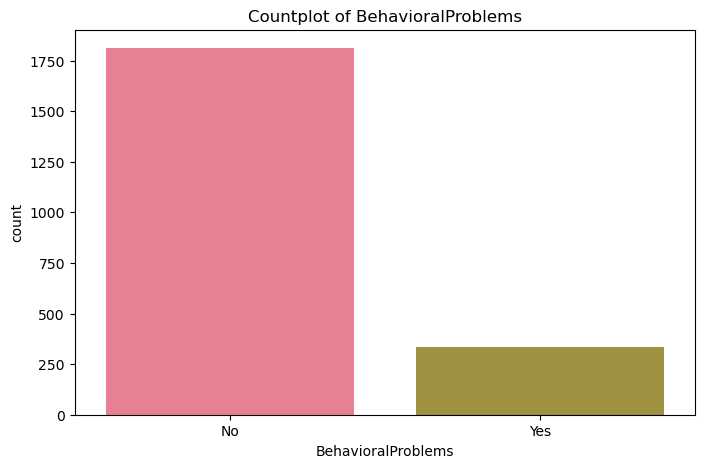

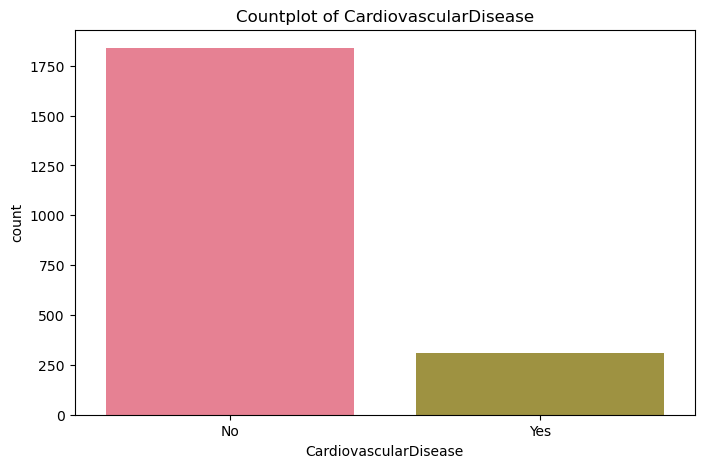

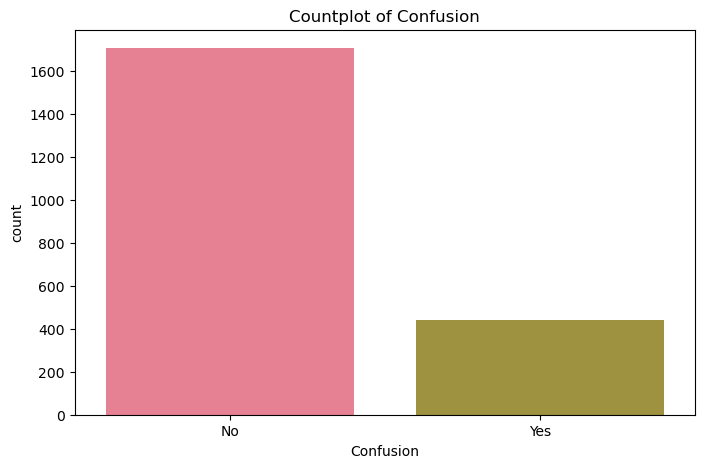

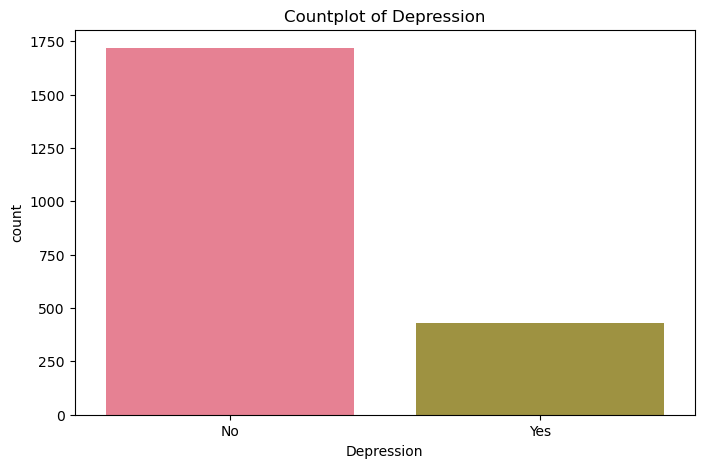

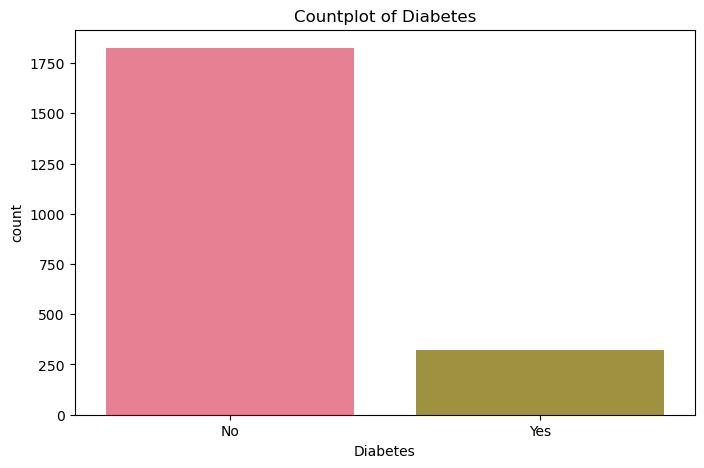

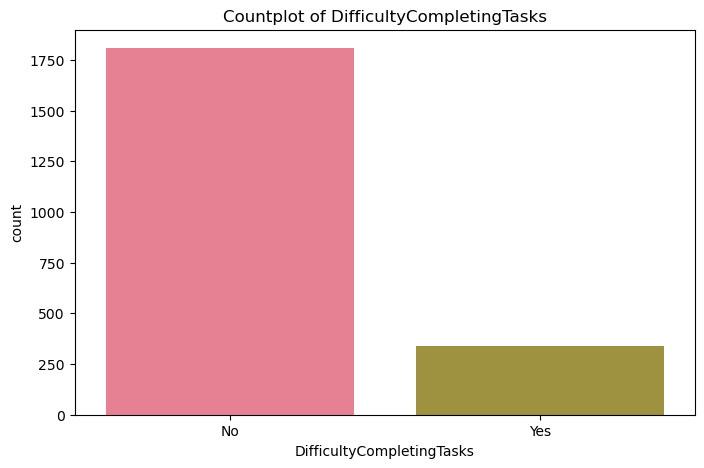

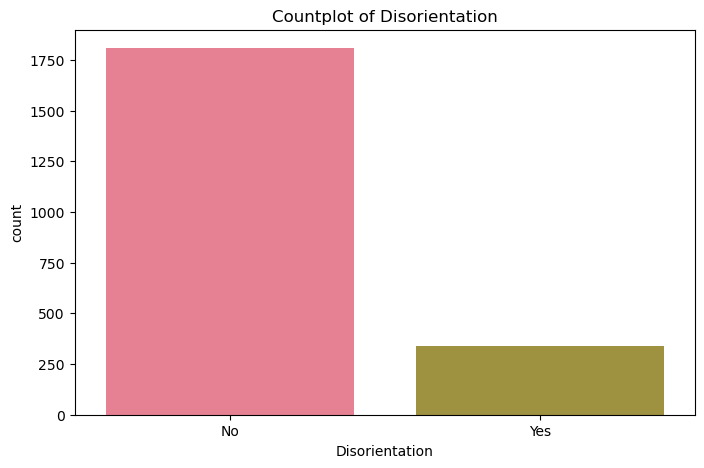

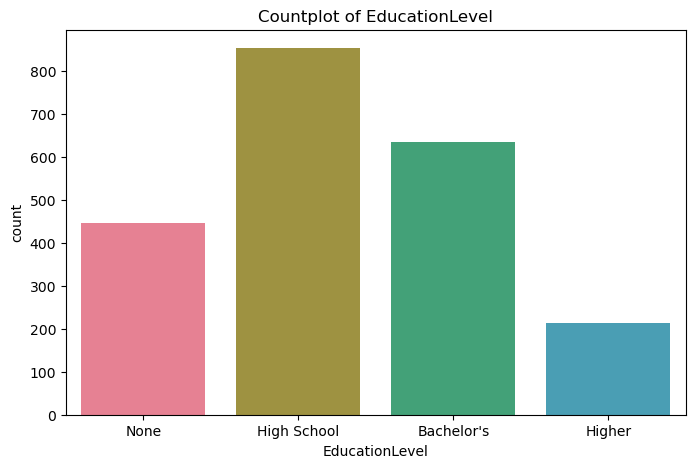

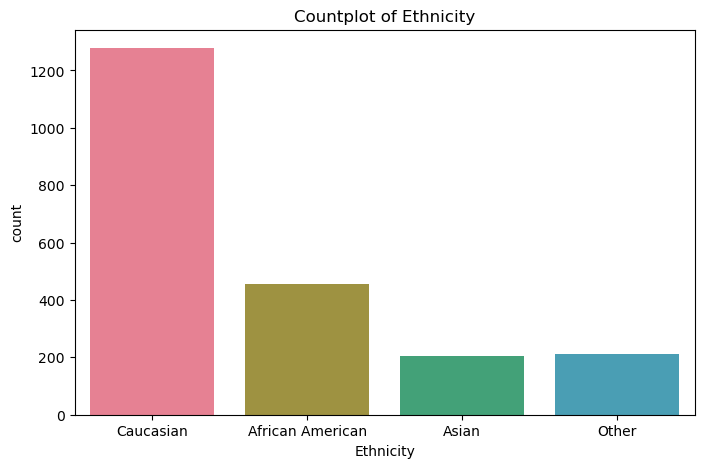

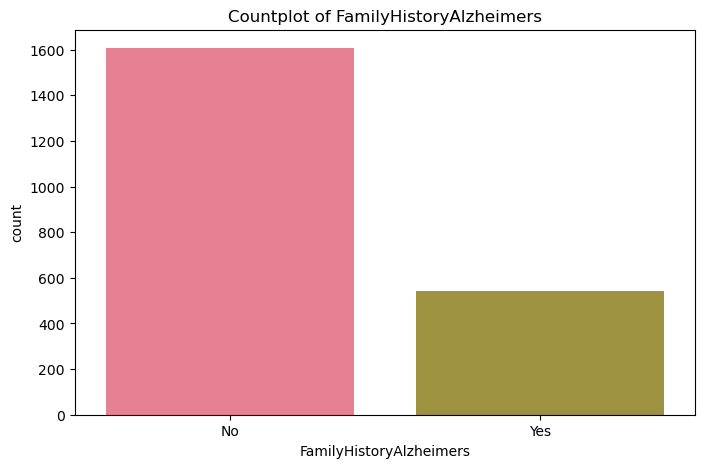

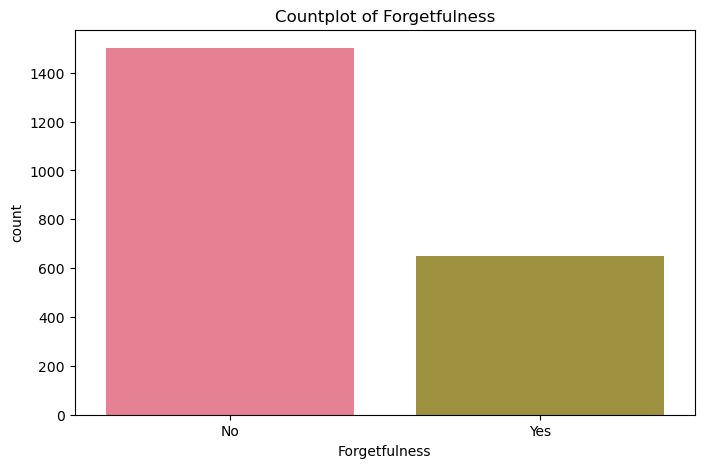

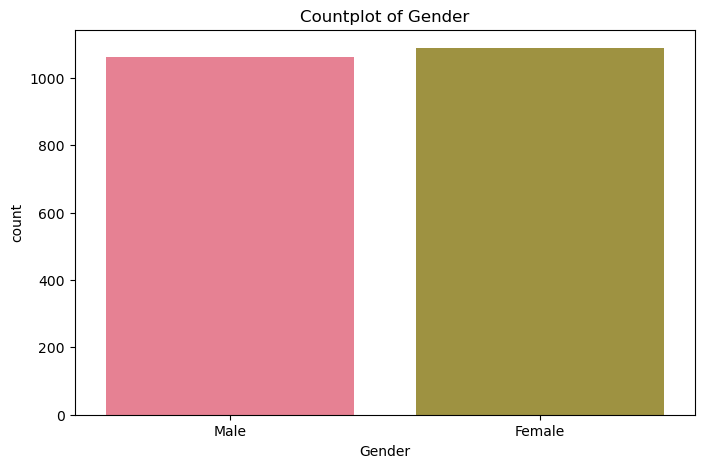

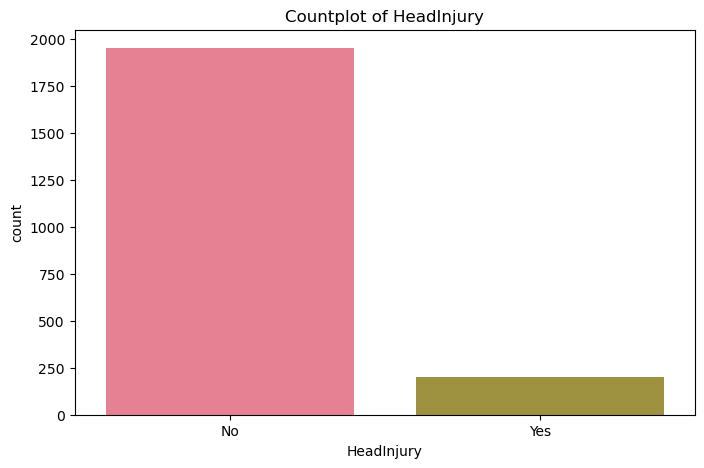

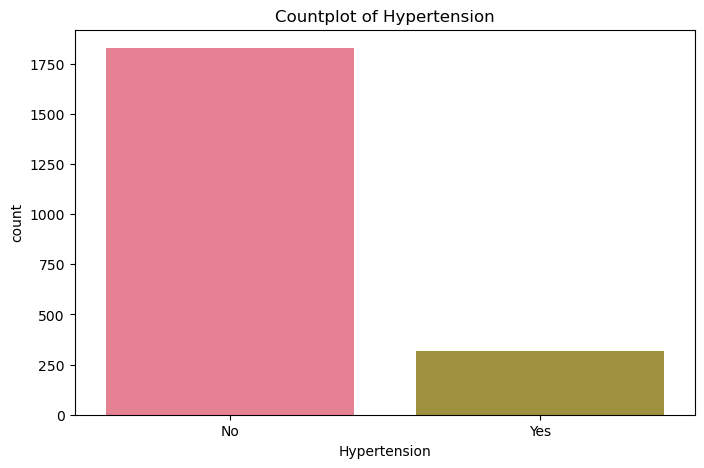

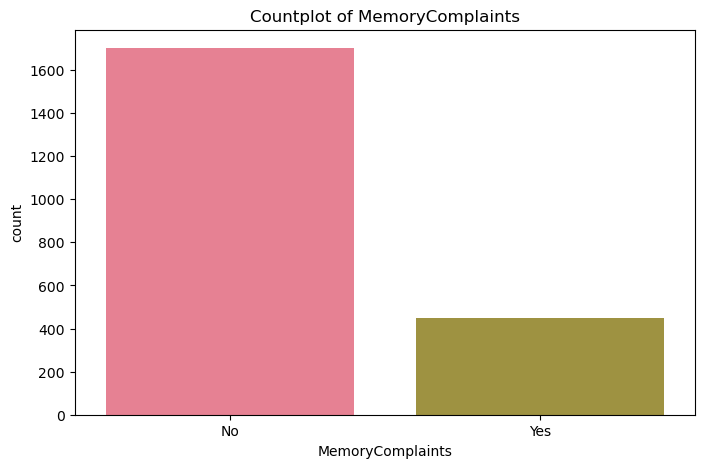

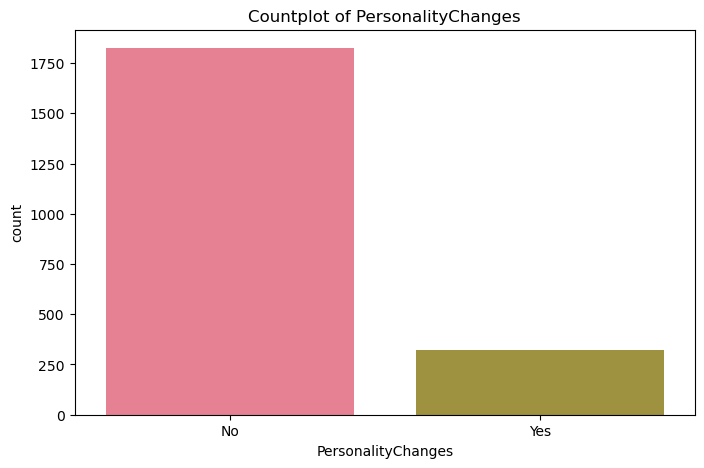

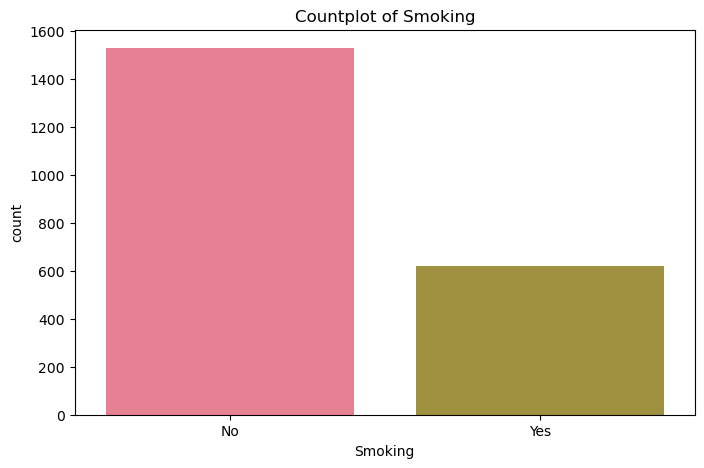

In [13]:
palette=sns.color_palette('husl',5)
custom_labels={
    'Gender':['Male','Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}
for col in categorical_variables:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df,x=col,palette=palette)
    plt.title(f'Countplot of {col}')
    labels=custom_labels[col]
    ticks=range(len(labels))
    plt.xticks(ticks=ticks,labels=labels)

plt.show()
    

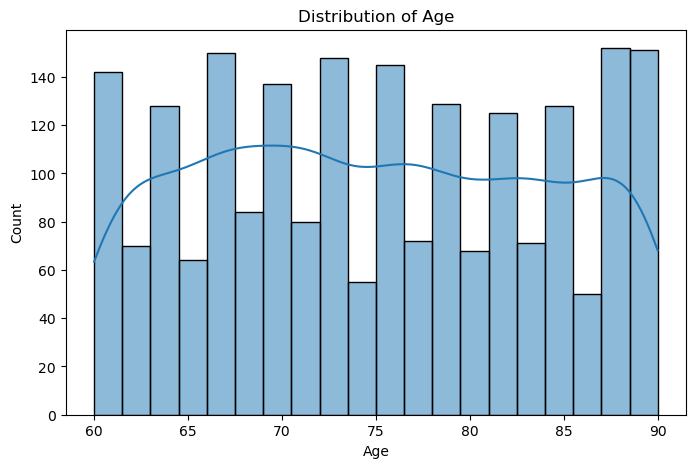

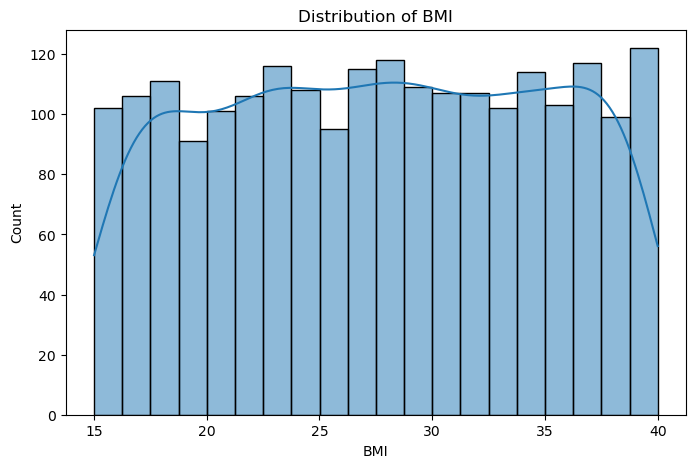

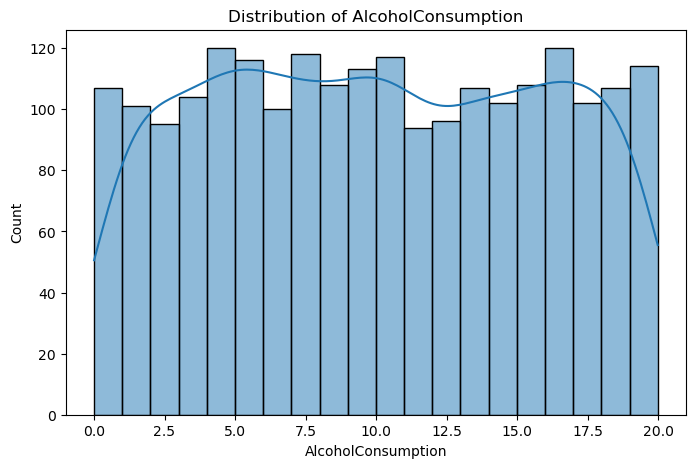

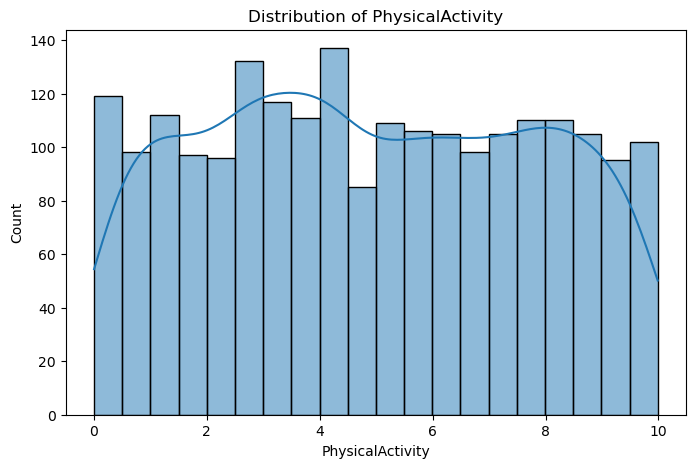

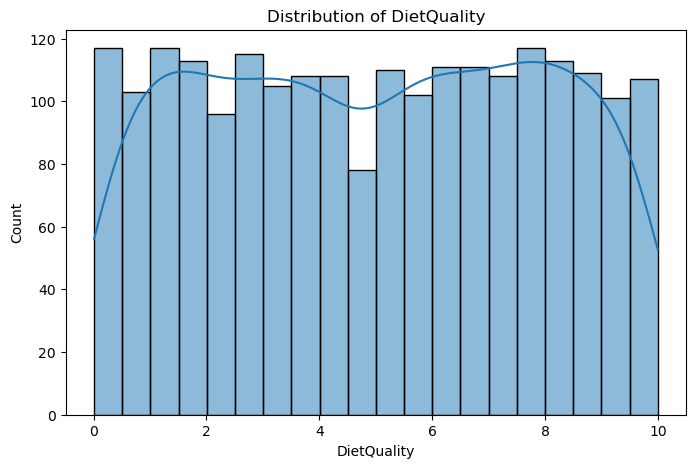

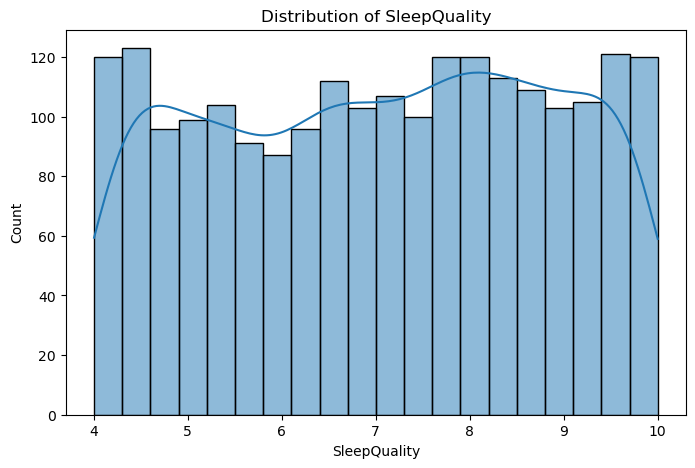

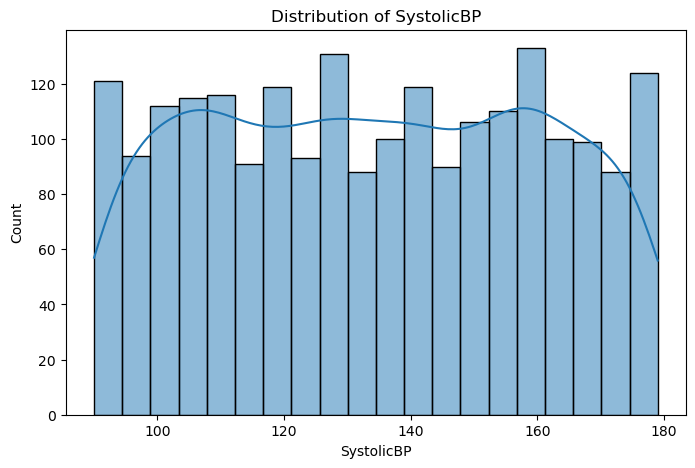

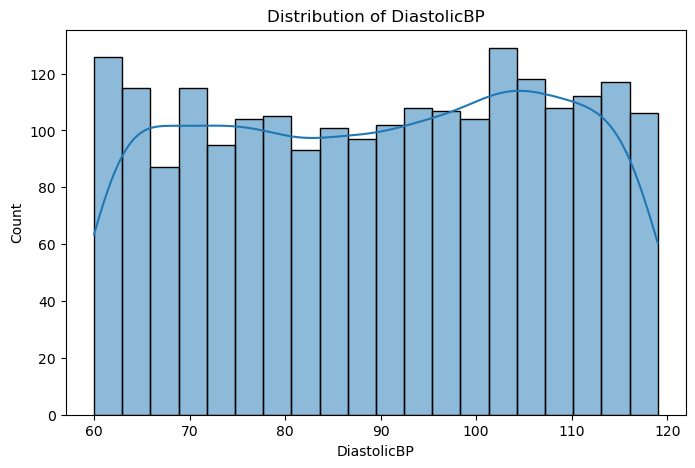

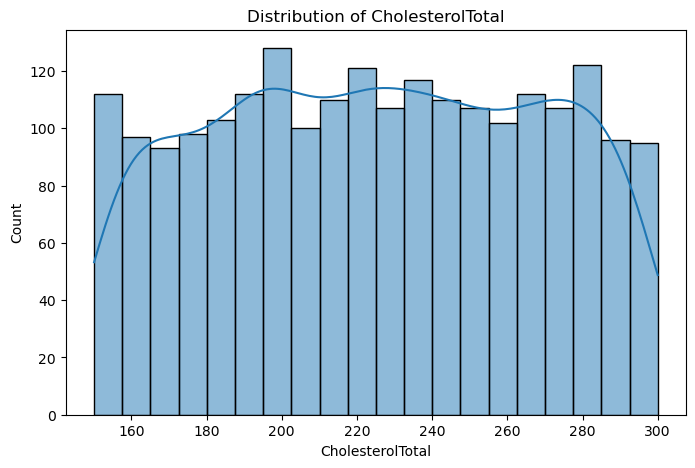

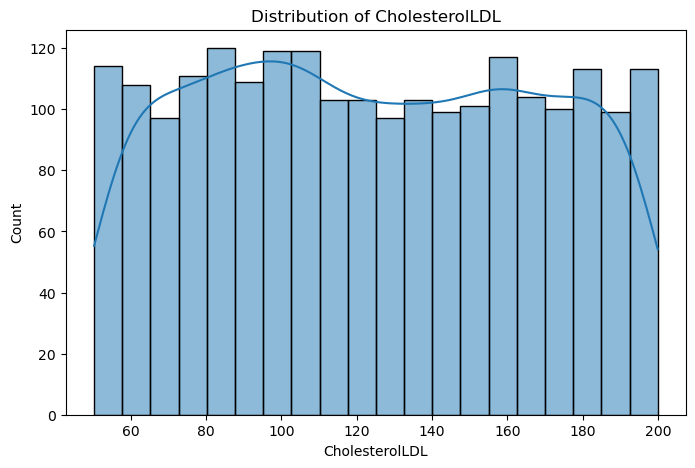

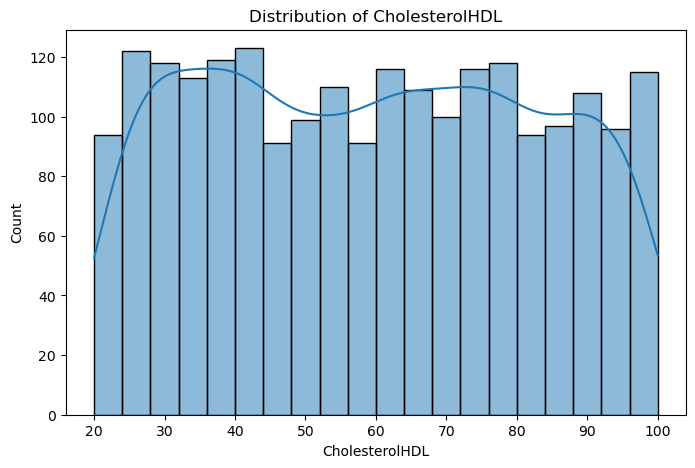

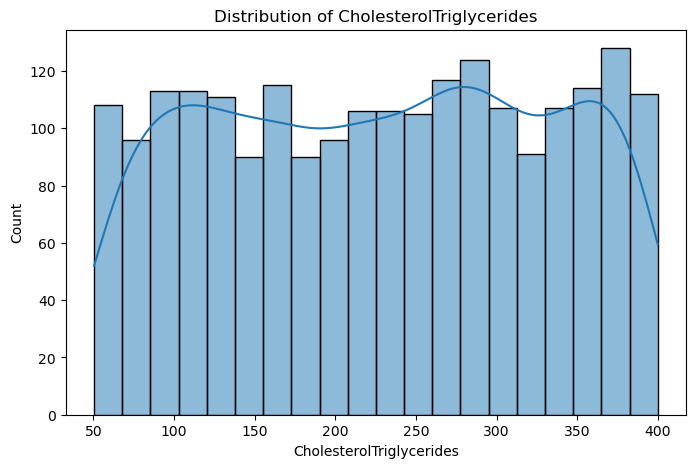

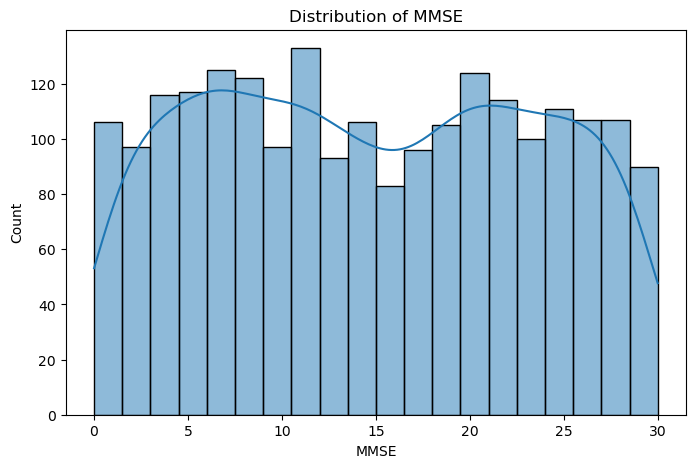

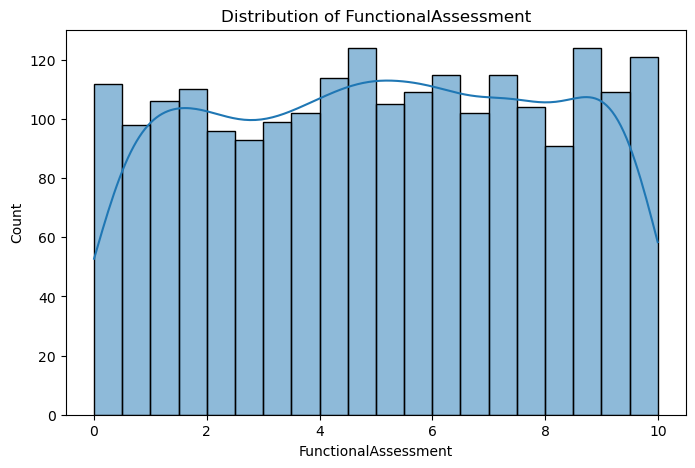

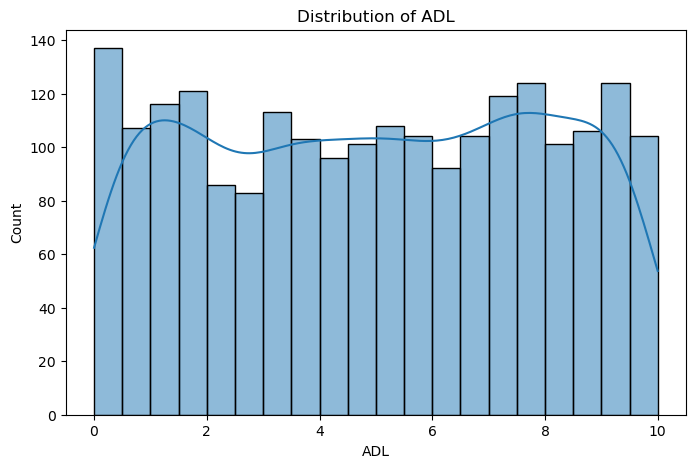

In [14]:
for col in numerical_variables:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df,x=col,kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

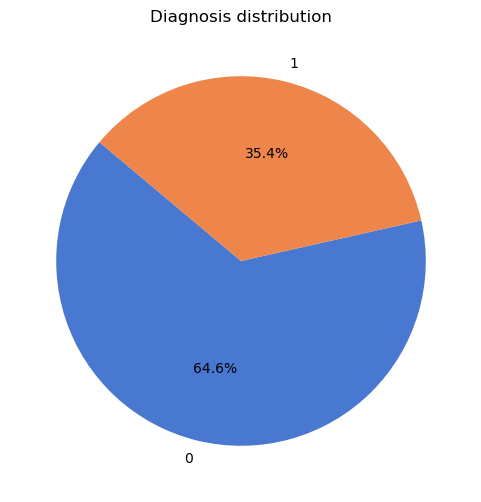

In [15]:
categories=[0,1]
counts=df.Diagnosis.value_counts().tolist()
colors=sns.color_palette("muted")
plt.figure(figsize=(6,6))
plt.pie(counts,labels=categories,autopct='%1.1f%%',startangle=140,colors=colors)
plt.title('Diagnosis distribution')
plt.show()

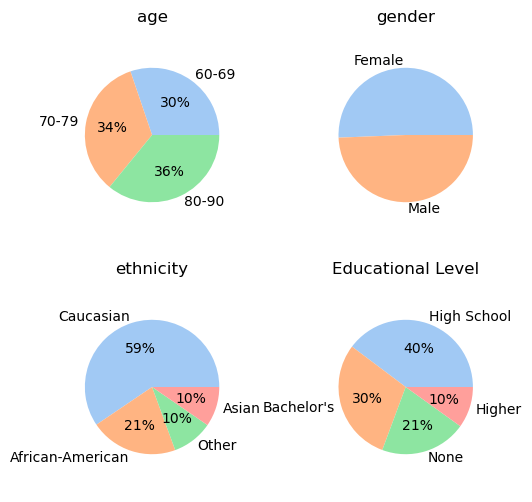

In [16]:
colors=sns.color_palette('pastel')[0:5]
#as we are going to build pie chart so we plot 2 row and 2 column
#fig,axs=plt.subplots(2,2, figsize(6,6))
fig, axs = plt.subplots(2, 2, figsize=(6, 6))


#now pie chart for age
df['bins']=pd.cut(df['Age'],bins=[60,69,79,90],labels=["60-69","70-79","80-90"])

axs[0, 0].pie(df.groupby('bins').size(), labels=df.groupby('bins').size().index, colors=colors,autopct='%.0f%%', radius=0.8)

axs[0,0].set_title("age")
#drop bins
df.drop(['bins'],axis=1,inplace=True)

#now pie chart for gender 
axs[0,1].pie(df['Gender'].value_counts(),labels=['Female','Male'],colors=colors,radius=0.8)
axs[0,1].set_title("gender")

#now pie chart for ethnicity
axs[1,0].pie(df['Ethnicity'].value_counts(),labels=['Caucasian', 'African-American', 'Other', 'Asian'],autopct='%.0f%%',colors=colors,radius=0.8)
axs[1,0].set_title("ethnicity")

#now pie chart for education level
axs[1, 1].pie(df['EducationLevel'].value_counts(), labels=['High School', "Bachelor's", 'None', 'Higher'], colors=colors, autopct='%.0f%%',radius=0.8)
axs[1, 1].set_title("Educational Level")
plt.show()

In [17]:
#preprocessing


# Split data into features (X) and target (y)
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
importance=model.feature_importances_
feature_importance_df=pd.DataFrame(
    {
    'Feature':X_train.columns,
     'Importance':importance
    }
)
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)
print(feature_importance_df)

                      Feature  Importance
23       FunctionalAssessment    0.182646
26                        ADL    0.164864
22                       MMSE    0.118611
24           MemoryComplaints    0.089466
25         BehavioralProblems    0.042107
8                 DietQuality    0.031654
20             CholesterolHDL    0.030757
21   CholesterolTriglycerides    0.030746
9                SleepQuality    0.029418
6          AlcoholConsumption    0.029263
18           CholesterolTotal    0.029000
4                         BMI    0.027905
7            PhysicalActivity    0.027505
16                 SystolicBP    0.027209
19             CholesterolLDL    0.027040
17                DiastolicBP    0.025957
0                         Age    0.022228
3              EducationLevel    0.010678
2                   Ethnicity    0.008349
31              Forgetfulness    0.004490
11      CardiovascularDisease    0.004350
5                     Smoking    0.003922
28             Disorientation    0

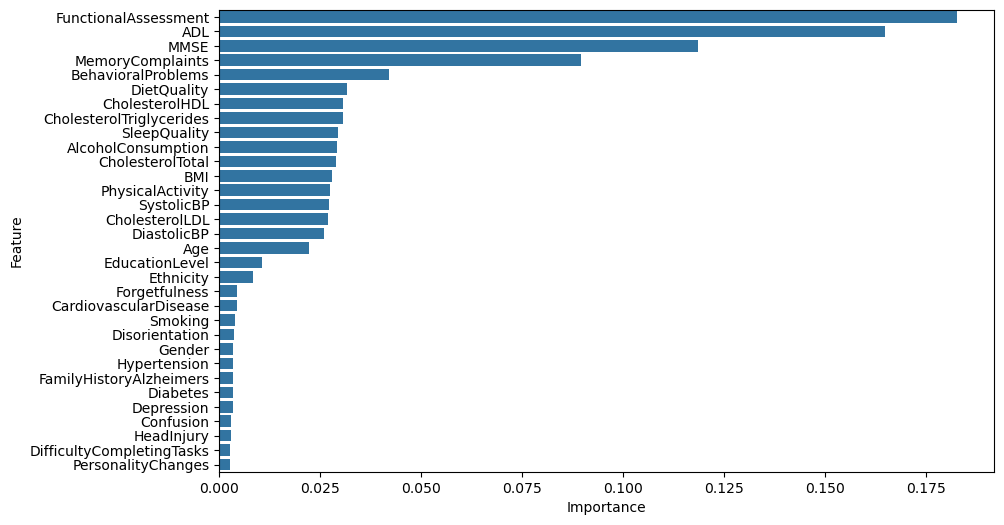

In [19]:
top_features=feature_importance_df.head(36)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=top_features)
plt.show()

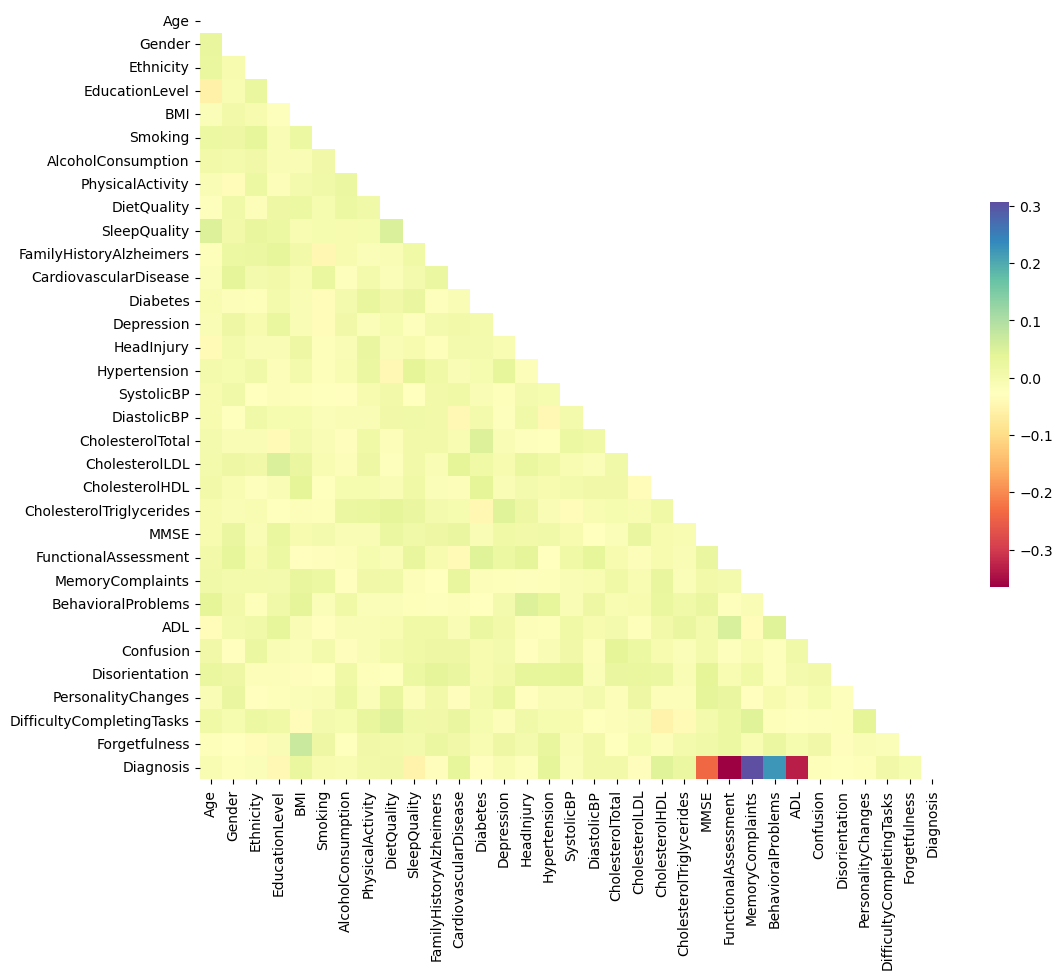

In [20]:
#correlation
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap="Spectral",cbar_kws={"shrink":0.5},mask=mask)
plt.show()

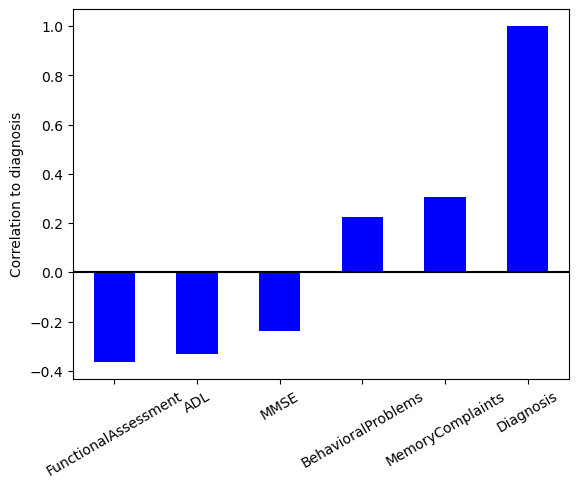

In [21]:
corr_matrix=df.corr()['Diagnosis']
heatcol=df.columns[corr_matrix.abs()>0.1]
df[heatcol].corr()['Diagnosis'].sort_values().plot(kind='bar',color='blue')
plt.axhline(0,color="k")
plt.ylabel('Correlation to diagnosis')
plt.xticks(rotation=30)
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
rf=RandomForestClassifier(random_state=0,class_weight='balanced')
# Apply RFECV for feature selection

rfecv=RFECV(rf,cv=5,step=1,scoring='accuracy')
X_train_fs=rfecv.fit_transform(X_train,y_train)
X_test_fs=rfecv.transform(X_test)

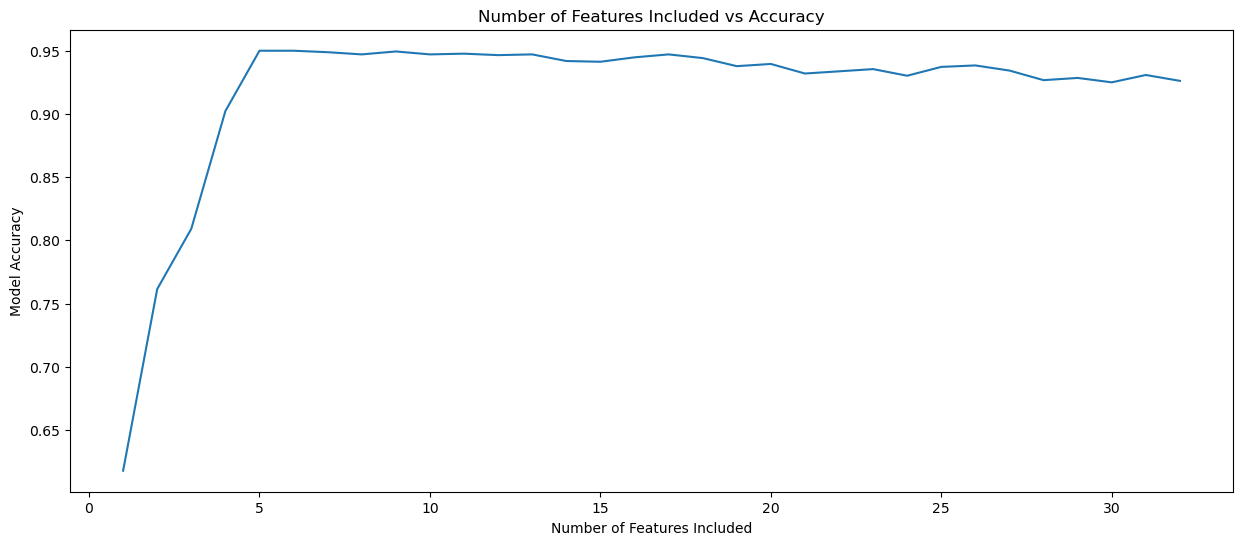

In [23]:
plt.figure(figsize=(15, 6))
plt.title('Number of Features Included vs Accuracy')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Accuracy')

# Getting the number of features selected at each stage
num_features = np.arange(1, len(rfecv.cv_results_['mean_test_score']) + 1)

plt.plot(num_features, rfecv.cv_results_['mean_test_score'])
plt.show()


In [25]:
# Print selected features
selected_feature_names = X_train.columns[rfecv.support_]
print(f"Selected Features: {selected_feature_names}")

Selected Features: Index(['DietQuality', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints',
       'BehavioralProblems', 'ADL'],
      dtype='object')


In [29]:


# Function to find the optimal value of k using the elbow method
def find_best_k_elbow(X_train, y_train, max_k):
    scores = []
    k_values = range(1, max_k + 1, 5)  # Testing k values in steps of 5 (adjust as needed)
    
    for k in k_values:
        selector = SelectKBest(f_classif, k=k)
        model = Pipeline([
            ('feature_selection', selector),
            ('classifier', RandomForestClassifier(random_state=42))  # You can change the classifier
        ])
        
        # Evaluate using cross-validation
        score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
        scores.append(score)
        
    # Find the elbow point
    knee_locator = KneeLocator(k_values, scores, curve="convex", direction="decreasing")
    best_k = knee_locator.knee
    
    # Plot k vs. score with elbow point
    plt.plot(k_values, scores, marker='o', label='CV Score')
    if best_k:
        plt.axvline(x=best_k, color='r', linestyle='--', label=f'Elbow at k={best_k}')
    plt.xlabel('Number of Features (k)')
    plt.ylabel('Cross-Validation Score')
    plt.title('Elbow Method for Optimal k')
    plt.legend()
    plt.show()

    return best_k



In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define best_k (number of features to select)
best_k = 6  # Change this based on your RFECV selection

# Apply SelectKBest
selector = SelectKBest(f_classif, k=best_k)
X_new = selector.fit_transform(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['SleepQuality', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints',
       'BehavioralProblems', 'ADL'],
      dtype='object')


In [32]:
#Standard scaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the selected features of the training data
X_train_fs = scaler.fit_transform(X_train_fs)

# Transform the selected features of the test data using the same scaler
X_test_fs= scaler.transform(X_test_fs)

In [33]:

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_fs, y_train = smote.fit_resample(X_train_fs, y_train)

In [34]:
print("Class distribution after SMOTE:")
print(pd.Series(y_train).value_counts())


Class distribution after SMOTE:
Diagnosis
0    1111
1    1111
Name: count, dtype: int64


In [35]:
# Define models and parameter grids
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=0, class_weight='balanced'),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15],
            'min_samples_split': [10, 20, 30],
            'min_samples_leaf': [5, 10, 15],
            'max_features': ['sqrt', 'log2']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=0, class_weight='balanced'),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'SVM': {
        'model': SVC(random_state=0, class_weight='balanced', probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=0),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'min_samples_split': [10, 20, 30]
        }
    }
}


In [36]:
#Evaluate model using GridSearchCv
best_model=None
best_score=0
best_model_name=''

for model_name, model_info in models.items():
    print(f"Training and tuning {model_name}...")
    grid_search=GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train_fs,y_train)
   
#get best model
# Get the best model and its score
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_model_name = model_name
    
    # Print results for the current model
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_ * 100:.2f}%")
    print("-" * 50)

# Train the best model on the full training set
best_model.fit(X_train_fs, y_train)

Training and tuning RandomForest...
Best parameters for RandomForest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation accuracy for RandomForest: 95.19%
--------------------------------------------------
Training and tuning LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy for LogisticRegression: 83.57%
--------------------------------------------------
Training and tuning SVM...
Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation accuracy for SVM: 92.67%
--------------------------------------------------
Training and tuning GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation accuracy for GradientBoosting: 94.92%
------------------------------------------------

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, random_state=0)

In [37]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_fs)
y_pred_proba = best_model.predict_proba(X_test_fs)[:, 1]  # For AUC-ROC# Evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Model: {best_model_name}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



Best Model: RandomForest
Test Accuracy: 95.35%


In [38]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       278
           1       0.95      0.92      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430



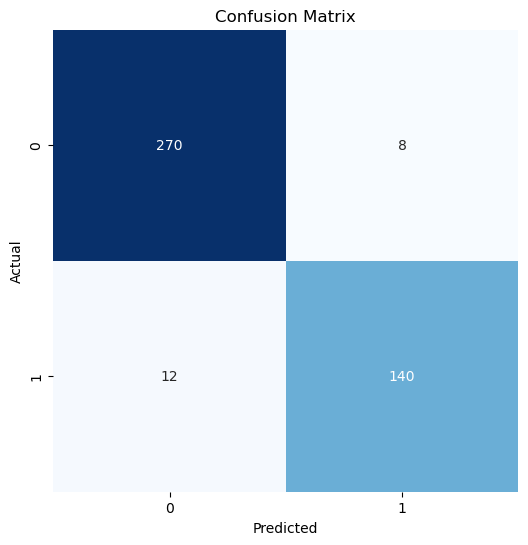

In [39]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

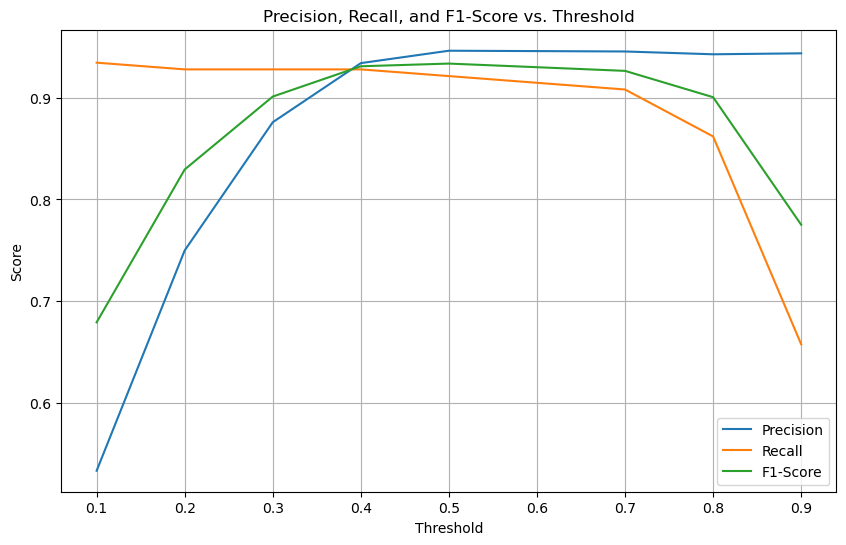

Best Threshold for F1-Score: 0.50


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a range of thresholds
thresholds = np.arange(0.1, 1.0, 0.1)

# Evaluate precision, recall, and F1-score for each threshold
results = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    results.append([threshold, precision, recall, f1])

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Threshold', 'Precision', 'Recall', 'F1-Score'])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(results_df['Threshold'], results_df['Precision'], label='Precision')
plt.plot(results_df['Threshold'], results_df['Recall'], label='Recall')
plt.plot(results_df['Threshold'], results_df['F1-Score'], label='F1-Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Print the best threshold based on F1-Score
best_threshold = results_df.loc[results_df['F1-Score'].idxmax(), 'Threshold']
print(f"Best Threshold for F1-Score: {best_threshold:.2f}")

In [46]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for class 1 (Alzheimer's)
y_pred_proba = best_model.predict_proba(X_test_fs)[:, 1]

# Experiment with different thresholds
threshold = 0.5 

# Convert probabilities to binary predictions based on the new threshold
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Recalculate confusion matrix & recall
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print("Adjusted Confusion Matrix:\n", cm_adjusted)

# New Recall Score
new_recall = cm_adjusted[1, 1] / (cm_adjusted[1, 0] + cm_adjusted[1, 1])
print(f"New Recall: {new_recall:.2f}")


Adjusted Confusion Matrix:
 [[270   8]
 [ 12 140]]
New Recall: 0.92


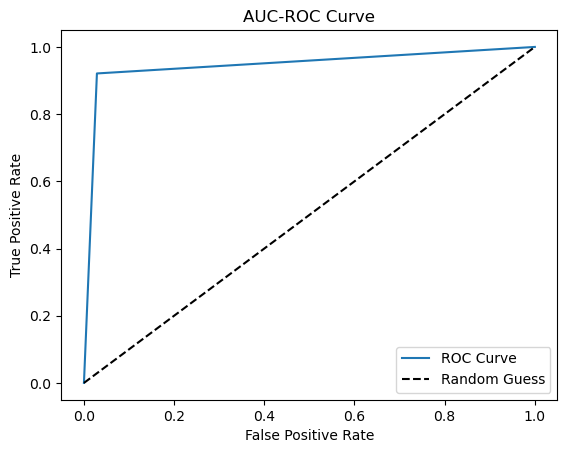

NameError: name 'roc_auc_score' is not defined

In [47]:
from sklearn.metrics import roc_curve

# AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_adjusted )
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba):.2f}")

In [51]:
# Cross-Validation to evaluate generalization
cv_scores = cross_val_score(best_model, X_train_fs, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-Validation Accuracy: 95.19%


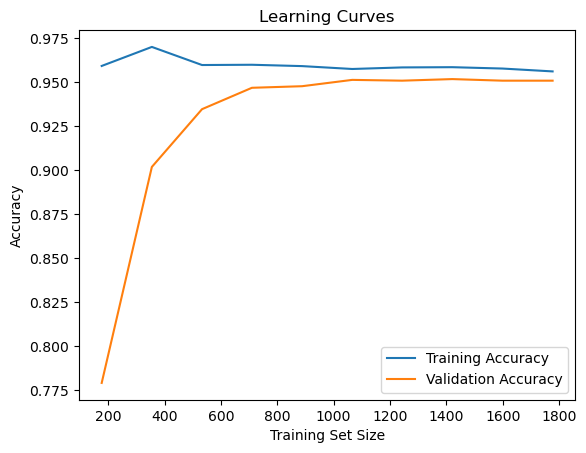

In [49]:
from sklearn.model_selection import learning_curve

# Plot Learning Curves to diagnose overfitting
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_fs, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

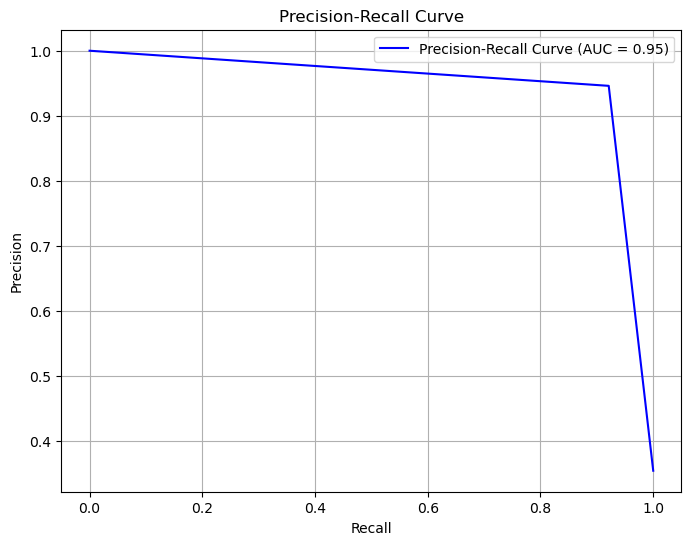

Precision-Recall AUC Score: 0.95


In [50]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve values
precision, recall, _ = precision_recall_curve(y_test, y_pred_adjusted )

# Calculate AUC of Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Print Precision-Recall AUC score
print(f"Precision-Recall AUC Score: {pr_auc:.2f}")


In [52]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = best_model.predict(X_test_fs)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9535


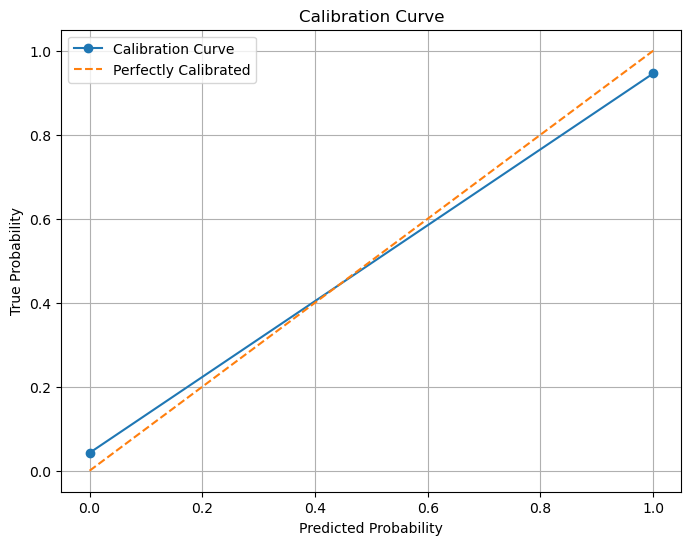

In [53]:
from sklearn.calibration import calibration_curve

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_adjusted , n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
from sklearn.model_selection import cross_val_predict

# Get out-of-fold predictions
oof_predictions = cross_val_predict(best_model, X_train_fs, y_train, cv=5, method='predict_proba')[:, 1]

# Evaluate out-of-fold AUC-ROC
oof_auc = roc_auc_score(y_train, oof_predictions)
print(f"Out-of-Fold AUC-ROC Score: {oof_auc:.2f}")

Out-of-Fold AUC-ROC Score: 0.97


In [57]:
from scipy.stats import sem, t

# Calculate confidence interval for accuracy
confidence = 0.95
n = len(y_test)
mean_accuracy = test_accuracy
std_error = sem([accuracy_score(y_test, best_model.predict(X_test_fs)) for _ in range(100)])  # Bootstrap
confidence_interval = t.interval(confidence, n-1, loc=mean_accuracy, scale=std_error)

print(f"Confidence Interval for Accuracy: {confidence_interval}")

Confidence Interval for Accuracy: (0.9534883720930233, 0.9534883720930233)


In [58]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [59]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']


Enter patient symptoms for the following features:


DietQuality:  1
MMSE:  0.5
FunctionalAssessment:  0.654
MemoryComplaints:  0
BehavioralProblems:  0
ADL:  1



==================== Diagnosis Result ====================
Predicted Class: 0 (Class 0) - Patient likely does not have Alzheimer’s disease
Class Probabilities:
╒═════════╤═══════════════╕
│  Class  │  Probability  │
╞═════════╪═══════════════╡
│ Class 0 │    96.80%    │
│ Class 1 │    3.20%    │
╘═════════╧═══════════════╛

==================== Prediction Probabilities ====================
Class 0 (Class 0): 96.80%
Class 1 (Class 1): 3.20%

==================== Feature Contributions ====================
╒═════════════════════════════════════╤════════════════╕
│ Feature                             │   Contribution │
╞═════════════════════════════════════╪════════════════╡
│ MemoryComplaints <= 0.24            │        -0.0608 │
├─────────────────────────────────────┼────────────────┤
│ ADL > 0.73                          │        -0.025  │
├─────────────────────────────────────┼────────────────┤
│ 0.32 < MMSE <= 0.53                 │        -0.011  │
├─────────────────────────────────

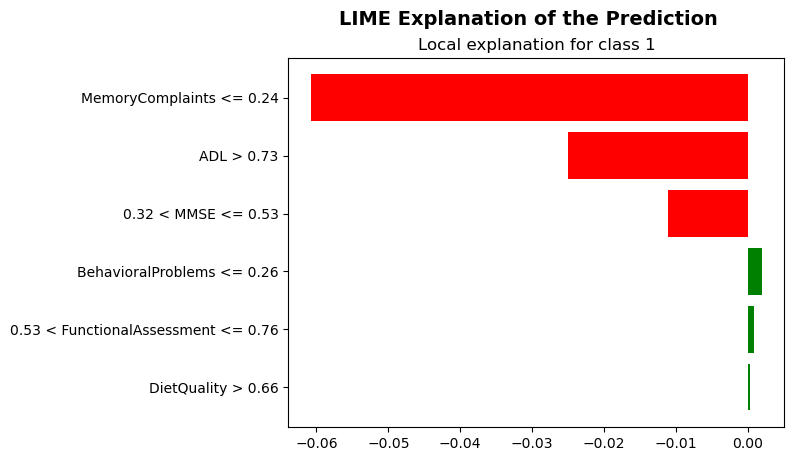

In [61]:
import numpy as np
import joblib  # To save and load models
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load the trained best model and scaler (Assuming they were saved earlier)
best_model = joblib.load("best_model.pkl")  # Load saved trained model
scaler = joblib.load("scaler.pkl")  # Load scaler used during training

# Selected features from RFECV
selected_features = ['DietQuality', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']

# Function for doctor to enter symptoms
def get_patient_input():
    print("\nEnter patient symptoms for the following features:")
    patient_data = []
    for feature in selected_features:
        value = float(input(f"{feature}: "))  # Input values for selected features
        patient_data.append(value)

    # Convert input into NumPy array and reshape
    patient_array = np.array(patient_data).reshape(1, -1)

    # Standardize input using previously fitted scaler
    patient_array_scaled = scaler.transform(patient_array)

    return patient_array_scaled, np.array(patient_data)  # Return raw input as well for explanation


# Function to explain prediction using LIME with better formatting
def explain_prediction_lime(patient_input, raw_input):
    # Initialize LIME explainer
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=scaler.transform(np.random.rand(100, len(selected_features))),  # Use random data as training data for explanation
        feature_names=selected_features,
        class_names=[str(i) for i in range(best_model.n_classes_)],  # Assumes a multi-class classifier
        mode="classification"
    )
    
    # Explain the prediction for the given input
    explanation = explainer.explain_instance(patient_input[0], best_model.predict_proba, num_features=len(selected_features))
    
    # Fetch prediction probabilities
    probabilities = best_model.predict_proba(patient_input)[0]

    # Display prediction probabilities in a clean way
    print("\n==================== Prediction Probabilities ====================")
    for idx, prob in enumerate(probabilities):
        print(f"Class {idx} (Class {idx}): {prob*100:.2f}%")
    print("===================================================================")

    # Feature Contributions (LIME's Explanation of the Prediction)
    print("\n==================== Feature Contributions ====================")
    feature_contributions = explanation.as_list()
    
    # Create a table for feature contributions
    table_data = []
    for feature, contribution in feature_contributions:
        table_data.append([feature, f"{contribution:.4f}"])
    
    # Display the table using tabulate for better readability
    print(tabulate(table_data, headers=["Feature", "Contribution"], tablefmt="fancy_grid"))
    print("===================================================================")

    # Display input feature values
    print("\n==================== Input Feature Values ====================")
    feature_values = zip(selected_features, raw_input)
    for feature, value in feature_values:
        print(f"{feature}: {value:.2f}")
    print("===================================================================")

    # Visualize the explanation with styled plot
    fig = explanation.as_pyplot_figure()
    fig.suptitle('LIME Explanation of the Prediction', fontsize=14, fontweight='bold')
    plt.show()


# Function to make prediction and print results in a more readable format
def predict_disease():
    patient_input, raw_input = get_patient_input()
    prediction = best_model.predict(patient_input)
    probability = best_model.predict_proba(patient_input)

    # Print the results in a styled way
    print("\n==================== Diagnosis Result ====================")
    if prediction[0] == 1:
        print(f"Predicted Class: 1 (Class 1) - Patient likely has Alzheimer’s disease")
    else:
        print(f"Predicted Class: 0 (Class 0) - Patient likely does not have Alzheimer’s disease")
    
    print("Class Probabilities:")
    print(f"╒═════════╤═══════════════╕")
    print(f"│  Class  │  Probability  │")
    print(f"╞═════════╪═══════════════╡")
    for idx, prob in enumerate(probability[0]):
        print(f"│ Class {idx} │    {prob*100:.2f}%    │")
    print(f"╘═════════╧═══════════════╛")
    
    # Explain the prediction using LIME
    explain_prediction_lime(patient_input, raw_input)

# Run prediction system
predict_disease()
